<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Rep-sequences" data-toc-modified-id="Rep-sequences-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Rep sequences</a></span></li><li><span><a href="#BLASTn-run" data-toc-modified-id="BLASTn-run-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>BLASTn run</a></span></li><li><span><a href="#Parsing-BLAST-results" data-toc-modified-id="Parsing-BLAST-results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Parsing BLAST results</a></span><ul class="toc-item"><li><span><a href="#Adding-taxonomy" data-toc-modified-id="Adding-taxonomy-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Adding taxonomy</a></span></li><li><span><a href="#Summarizing" data-toc-modified-id="Summarizing-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Summarizing</a></span><ul class="toc-item"><li><span><a href="#Number-of-OTUs-lacking-a-culture" data-toc-modified-id="Number-of-OTUs-lacking-a-culture-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Number of OTUs lacking a culture</a></span></li><li><span><a href="#Which-taxonomic-groups?" data-toc-modified-id="Which-taxonomic-groups?-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Which taxonomic groups?</a></span></li><li><span><a href="#Distribution-of-OTUs-lacking-a-rep" data-toc-modified-id="Distribution-of-OTUs-lacking-a-rep-7.2.3"><span class="toc-item-num">7.2.3&nbsp;&nbsp;</span>Distribution of OTUs lacking a rep</a></span><ul class="toc-item"><li><span><a href="#iTOL" data-toc-modified-id="iTOL-7.2.3.1"><span class="toc-item-num">7.2.3.1&nbsp;&nbsp;</span>iTOL</a></span></li></ul></li><li><span><a href="#Distribution-per-microbe-class" data-toc-modified-id="Distribution-per-microbe-class-7.2.4"><span class="toc-item-num">7.2.4&nbsp;&nbsp;</span>Distribution per microbe class</a></span><ul class="toc-item"><li><span><a href="#iTOL" data-toc-modified-id="iTOL-7.2.4.1"><span class="toc-item-num">7.2.4.1&nbsp;&nbsp;</span>iTOL</a></span></li></ul></li><li><span><a href="#Methanobactericeae" data-toc-modified-id="Methanobactericeae-7.2.5"><span class="toc-item-num">7.2.5&nbsp;&nbsp;</span>Methanobactericeae</a></span></li><li><span><a href="#Best-hits-for-Methanothermobacter" data-toc-modified-id="Best-hits-for-Methanothermobacter-7.2.6"><span class="toc-item-num">7.2.6&nbsp;&nbsp;</span>Best hits for Methanothermobacter</a></span><ul class="toc-item"><li><span><a href="#Adding-average-abundances" data-toc-modified-id="Adding-average-abundances-7.2.6.1"><span class="toc-item-num">7.2.6.1&nbsp;&nbsp;</span>Adding average abundances</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Determine the closest type strains for each OTU in the dataset.
* Using SILVA "All-Species Living Tree Project" dataset, which comprises all 16S genes for all type strains

# Var

In [205]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity/'
tmp_dir = '/ebio/abt3_scratch/Georg_animal_feces/tmp/'

# phyloseq
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD.RDS'
# all post LLA sequences
rep_seq_qza_file = file.path('/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/', 'merged', 'rep-seqs_merged_filt.qza')
# LTP blast database
LTP_blast_db_file = '/ebio/abt3_projects/databases_no-backup/SILVA/all_species_living_tree/LTPs132_SSU_blastdb.fasta'
LTP_blast_csv_file = '/ebio/abt3_projects/databases_no-backup/SILVA/all_species_living_tree/LTPs132_SSU.csv'

# params
hit_len_cutoff = 0.95   # fraction of query that must be aligned to subject
threads = 24
conda_env = 'qiime2-2019.10'


# Init

In [206]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [207]:
make_dir(work_dir)
make_dir(tmp_dir)
df.dims()
setDTthreads(8)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity/ 
Directory already exists: /ebio/abt3_scratch/Georg_animal_feces/tmp/ 


# Load

In [208]:
# loading phyloseq object
physeq_arch_IndD = readRDS(physeq_arch_IndD_file)
physeq_arch_IndD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1891 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1891 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1891 tips and 1888 internal nodes ]

In [115]:
# LTP summary
LTP_blast_csv = read.delim(LTP_blast_csv_file, sep='\t', header=FALSE)
LTP_blast_csv

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
FJ611848,1,1348,s128,Erwinia gerundensis,,Erwiniaceae,,http://www.bacterio.net/erwinia.html,"Bacteria/Alpha, Beta and Gammaproteobacteria/Gammaproteobacteria and Betaproteobacteria/Enterobacterales, Pasteurellales and Orbales/Erwiniaceae",Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriales;Erwiniaceae;Erwinia
GU810925,1,1494,s108,Erwinia oleae,,Erwiniaceae,1,http://www.bacterio.net/erwinia.html,"Bacteria/Alpha, Beta and Gammaproteobacteria/Gammaproteobacteria and Betaproteobacteria/Enterobacterales, Pasteurellales and Orbales/Erwiniaceae",Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacteriales;Erwiniaceae;Erwinia
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CP000493,1664038,1665353,s93,Hyperthermus butylicus,type sp.,Pyrodictiaceae,1,http://www.bacterio.net/hyperthermus.html,Archaea/Crenarchaeota/Pyrodictiaceae,Archaea;Crenarchaeota;Thermoprotei;Desulfurococcales;Pyrodictiaceae;Hyperthermus
CP007536,892626,894095,s121,Nitrososphaera viennensis,type sp.,Nitrososphaeraceae,,http://www.bacterio.net/nitrososphaera.html,Archaea,Archaea;Thaumarchaeota;Nitrososphaerales;Nitrososphaeraceae;Nitrososphaera


# Rep sequences

In [273]:
# exporting sequences
cmd = 'qiime tools export --input-path %s --output-path %s'
cmd = sprintf(cmd, rep_seq_qza_file, tmp_dir)
bash_job(cmd, conda_env=conda_env)

In [40]:
dna_seq_file = file.path(tmp_dir, 'dna-sequences.fasta')
file.info(dna_seq_file)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/ebio/abt3_scratch/Georg_animal_feces/tmp//dna-sequences.fasta,36783199,FALSE,644,2020-06-14 08:44:23,2020-06-14 08:44:54,2020-06-14 08:44:23,6354,353,nyoungblut,abt3


# BLASTn run

In [5]:
blast_out_file = file.path(work_dir, 'rep-seqs_merged_filt_blastn-LTP.txt')
blast_out_file

[1] "/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity//rep-seqs_merged_filt_blastn-LTP.txt"

In [50]:
outfmt = '\\"6 qaccver saccver pident length mismatch gapopen qlen qstart qend slen sstart send evalue\\"'
cmd = 'blastn -query %s -subject %s -out %s -evalue 1e-5 -num_threads %s -outfmt %s'
cmd = sprintf(cmd, dna_seq_file, LTP_blast_db_file, blast_out_file, threads, outfmt)
cmd

[1] "blastn -query /ebio/abt3_scratch/Georg_animal_feces/tmp//dna-sequences.fasta -subject /ebio/abt3_projects/databases_no-backup/SILVA/all_species_living_tree/LTPs132_SSU_blastdb.fasta -out /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity//rep-seqs_merged_filt_blastn-LTP.txt -evalue 1e-5 -num_threads 24 -outfmt \\\"6 qaccver saccver pident length mismatch gapopen qlen qstart qend slen sstart send evalue\\\""

In [51]:
# running blast job
bash_job(cmd, conda_env='py3_genome')

'num_threads' is currently ignored when 'subject' is specified.

NULL

In [52]:
send_email('http://127.0.0.1:9705/notebooks/notebooks/16S_arch/MiSeq-Runs116-122-126-189-190/01_LLA/11_closest_type_strains.ipynb')

Sending email to: nyoungblut@tuebingen.mpg.de



In [53]:
# output file
file.info(blast_out_file)

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
,<dbl>,<lgl>,<octmode>,<dttm>,<dttm>,<dttm>,<int>,<int>,<chr>,<chr>
/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity//rep-seqs_merged_filt_blastn-LTP.txt,5787873369,FALSE,644,2020-06-14 15:53:22,2020-06-14 15:53:22,2020-06-14 08:47:01,6354,353,nyoungblut,abt3


# Parsing BLAST results

In [6]:
# load table
blast_res = Fread(blast_out_file) %>%
    dt_filter(V4 / V7 >= hit_len_cutoff,
              V3 >= 85)
colnames(blast_res) = c(
    'qaccver',
    'saccver',
    'pident',
    'length',
    'mismatch',
    'gapopen',
    'qlen',
    'qstart',
    'qend',
    'slen',
    'sstart',
    'send',
    'evalue')
blast_res

qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
000029244345a7c6e454809d6a334492,lcl\|LTPs132_SSU\|AarDelic\|1451bp\|Rikenellaceae\|AB298736,88.350,412,46,2,416,1,411,1451,493,903,1.36e-139
000029244345a7c6e454809d6a334492,lcl\|LTPs132_SSU\|MuiHirud\|1511bp\|Rikenellaceae\|HG934468,88.378,413,44,4,416,1,411,1511,499,909,1.36e-139
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fffd4d88f98e37e62eaa23deafeca2d0,lcl\|LTPs132_SSU\|ConArcti\|1441bp\|Paenibacillaceae\|HQ315787,85.060,415,57,4,419,1,413,1441,465,876,8.47e-117
fffd4d88f98e37e62eaa23deafeca2d0,lcl\|LTPs132_SSU\|CloColla\|1506bp\|Clostridiaceae\|X73439,85.132,417,50,11,419,1,413,1506,488,896,3.05e-116


## Adding taxonomy

In [7]:
# adding taxonomy
tax = physeq_arch_IndD %>%
    phyloseq2df(tax_table) %>%
    as.data.table
tax 

Domain,Phylum,Class,Order,Family,Genus,Species,OTU
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,0e97060fe4b9be17bddeedcd27826b04
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,a86c26bd7f16d93e38b101dbd2614a07
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,9449f372c36cd2d8994d79b091425d42
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,467eeae6997d3667b5d07a76bc1bcdfd


In [8]:
# joining
overlap(blast_res, tax, qaccver, OTU)
blast_res = blast_res %>%
    dt_inner_join(tax, c('qaccver'='OTU'))
tax = NULL
blast_res

intersect(x,y): 1744 
setdiff(x,y): 74378 
setdiff(y,x): 147 
union(x,y): 76269 


qaccver,saccver,pident,length,mismatch,gapopen,qlen,qstart,qend,slen,sstart,send,evalue,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
e49aea031100097ee25afdeb3fa5ca11,lcl\|LTPs132_SSU\|MthOlley\|1266bp\|Methanobacteriaceae\|AY615201,85.012,427,54,9,420,1,420,1266,374,797,5.07e-119,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei
21751bfde2294a2dae4b25267b4ca645,lcl\|LTPs132_SSU\|MthThaue\|1268bp\|Methanobacteriaceae\|U55236,86.824,425,51,5,421,1,421,1268,408,831,4.98e-134,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9449f372c36cd2d8994d79b091425d42,lcl\|LTPs132_SSU\|MctFormi\|1376bp\|Methanobacteriaceae\|AF169245,85.882,425,57,3,423,1,423,1376,414,837,8.43e-127,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified
9449f372c36cd2d8994d79b091425d42,lcl\|LTPs132_SSU\|MctPetro\|1392bp\|Methanobacteriaceae\|AB542742,85.176,425,60,3,423,1,423,1392,421,844,3.06e-121,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified


In [9]:
# filtered table
blast_res %>% dt_pull(qaccver) %>% unique_n('OTUs')

No. of unique OTUs: 1744 


## Summarizing

### Number of OTUs lacking a culture

In [10]:
total_OTUs = physeq_arch_IndD %>% taxa_names %>% unique %>% length
cat('Total no. of OTUs:', total_OTUs, '\n')

Total no. of OTUs: 1891 


In [11]:
# max perc seqID of query
blast_res_s = blast_res %>%
    dt_summarize(max_pident = max(pident), 
                 by = c(Domain, Phylum, Class, Order, Family, Genus, qaccver)) 

blast_res_s$max_pident %>% summary
blast_res_s

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  85.01   91.04   95.75   94.55   97.88   99.77 

Domain,Phylum,Class,Order,Family,Genus,qaccver,max_pident
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,e49aea031100097ee25afdeb3fa5ca11,85.012
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,21751bfde2294a2dae4b25267b4ca645,86.824
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,2ff60015277d12d8ca868dab173e96fb,87.674
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,9449f372c36cd2d8994d79b091425d42,88.263


In [12]:
# filtering blast results
blast_res_s_s = blast_res_s %>%
    dt_filter(max_pident < 97) %>%
    dt_summarize(n=length(max_pident), c(Domain, Phylum, Class, Order, Family, Genus)) 
blast_res_s_s$n %>% sum

[1] 7339416

In [13]:
#' OTUs with a hit at specific seqID cutoff
otus_with_rep = function(seqid_cutoff, blast_res_s){
    seqid_cutoff = enquo(seqid_cutoff)
    blast_res_s %>%
        dt_filter(max_pident < !!seqid_cutoff) %>%
        dt_pull(qaccver) %>% unique %>% length
}

In [14]:
# checking multiple seqID cutoffs
seqID_cutoff = 85:100
n_remain = sapply(seqID_cutoff, otus_with_rep, blast_res_s=blast_res_s)

df = data.frame(seqID_cutoff = seqID_cutoff,
                n_OTUs = n_remain) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    arrange(-seqID_cutoff)
df

seqID_cutoff,n_OTUs,perc_OTUs_with_hit,perc_OTUs_without_hit
<int>,<int>,<dbl>,<dbl>
100,1744,7.773665,92.22634
99,1590,15.917504,84.08250
⋮,⋮,⋮,⋮
86,23,98.78371,1.216288
85,0,100.00000,0.000000


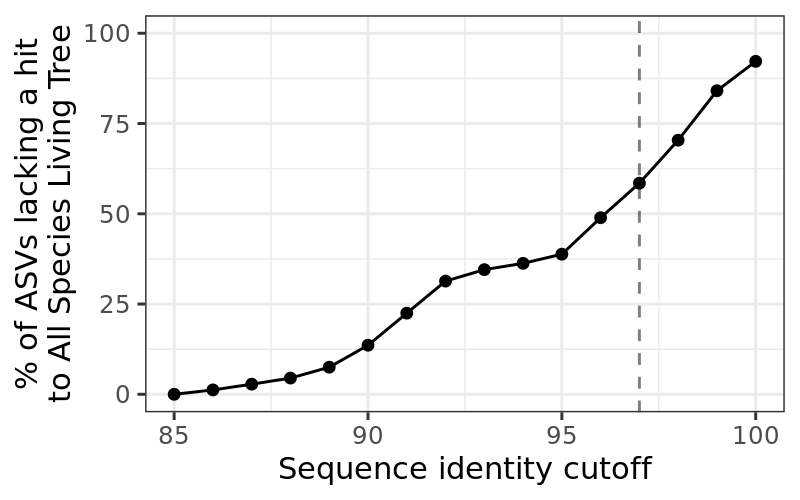

In [15]:
# plotting
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_without_hit)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line() +
    geom_point() +
    scale_y_continuous(limits = c(0, 100)) +
    labs(x='Sequence identity cutoff',
         y='% of ASVs lacking a hit\nto All Species Living Tree') +
    theme_bw() 

p.dims(4,2.5)
plot(p)

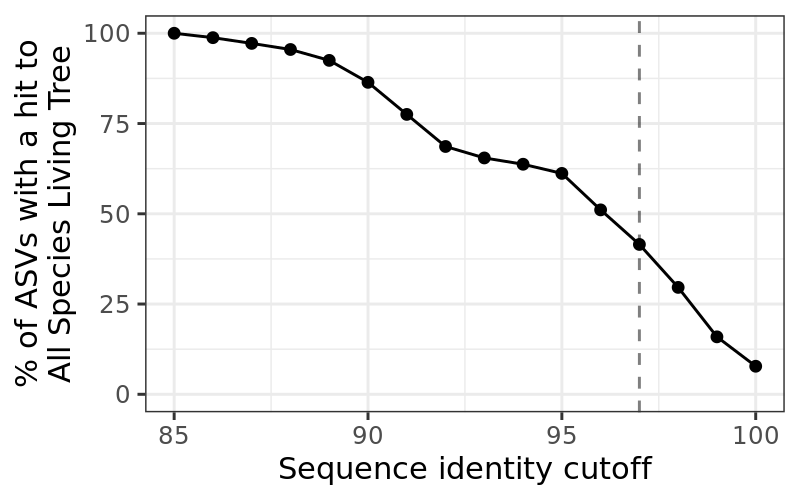

In [16]:
# plotting (reverse)
p = ggplot(df, aes(seqID_cutoff, perc_OTUs_with_hit)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line() +
    geom_point() +
    scale_y_continuous(limits = c(0, 100)) +
    labs(x='Sequence identity cutoff',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() 

p.dims(4,2.5)
plot(p)

### Which taxonomic groups?

In [17]:
# adding taxonomy
tax = physeq_arch_IndD %>%
    phyloseq2df(tax_table) %>%
    as.data.table %>%
    mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
    group_by(Taxonomy) %>%
    summarize(total_per_tax_OTUs = n(), .groups='drop')
df.dims(30)
tax %>% arrange(-total_per_tax_OTUs)
df.dims()

Taxonomy,total_per_tax_OTUs
<chr>,<int>
Euryarchaeota;Methanobacteria,991
Euryarchaeota;Methanomicrobia,321
Euryarchaeota;Thermoplasmata,230
Thaumarchaeota;Nitrososphaeria,167
Euryarchaeota;Halobacteria,121
Nanoarchaeaeota;Woesearchaeia,24
Crenarchaeota;Bathyarchaeia,22
Euryarchaeota;unclassified,11
Euryarchaeota;Thermococci,2


In [18]:
#' OTUs with a hit
otus_with_rep = function(seqid_cutoff, blast_res_s, tax_table){
    x = blast_res_s %>%
        mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
        left_join(tax_table, c('Taxonomy')) %>%
        #mutate(max_pident = ifelse(is.na(max_pident), 0, max_pident)) %>%
        filter(max_pident < seqid_cutoff) %>%
        distinct(Taxonomy, qaccver, total_per_tax_OTUs) %>%
        group_by(Taxonomy, total_per_tax_OTUs) %>%
        summarize(n_OTUs = n(), 
                  .groups='drop')
    x$seqID_cutoff = seqid_cutoff
    return(x)
}

In [19]:
# per cutoff
seqID_cutoff = 86:100
df = lapply(as.list(seqID_cutoff), 
            otus_with_rep, 
            blast_res_s=as.data.frame(blast_res_s),
            tax_table=tax) %>%
    do.call(rbind, .) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_per_tax_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit,
           perc_total_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_total_OTUs_without_hit = 100 - perc_total_OTUs_with_hit) %>%
    group_by(Taxonomy) %>%
    mutate(max_n_OTUs = max(n_OTUs)) %>%
    ungroup() %>%
    filter(!grepl('unclassified', Taxonomy),
           max_n_OTUs >= 50)

tmp = df %>%
    filter(seqID_cutoff == 90) %>%
    mutate(perc_OTUs_with_hit = 100,
           seqID_cutoff = 85)
df 

Taxonomy,total_per_tax_OTUs,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,perc_total_OTUs_with_hit,perc_total_OTUs_without_hit,max_n_OTUs
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Euryarchaeota;Methanobacteria,991,12,86,98.78910,1.2108981,99.36542,0.6345849,946
Euryarchaeota;Methanomicrobia,321,3,86,99.06542,0.9345794,99.84135,0.1586462,304
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Euryarchaeota;Thermoplasmata,230,197,100,14.347826,85.65217,89.58223,10.417768,197
Thaumarchaeota;Nitrososphaeria,167,165,100,1.197605,98.80240,91.27446,8.725542,165


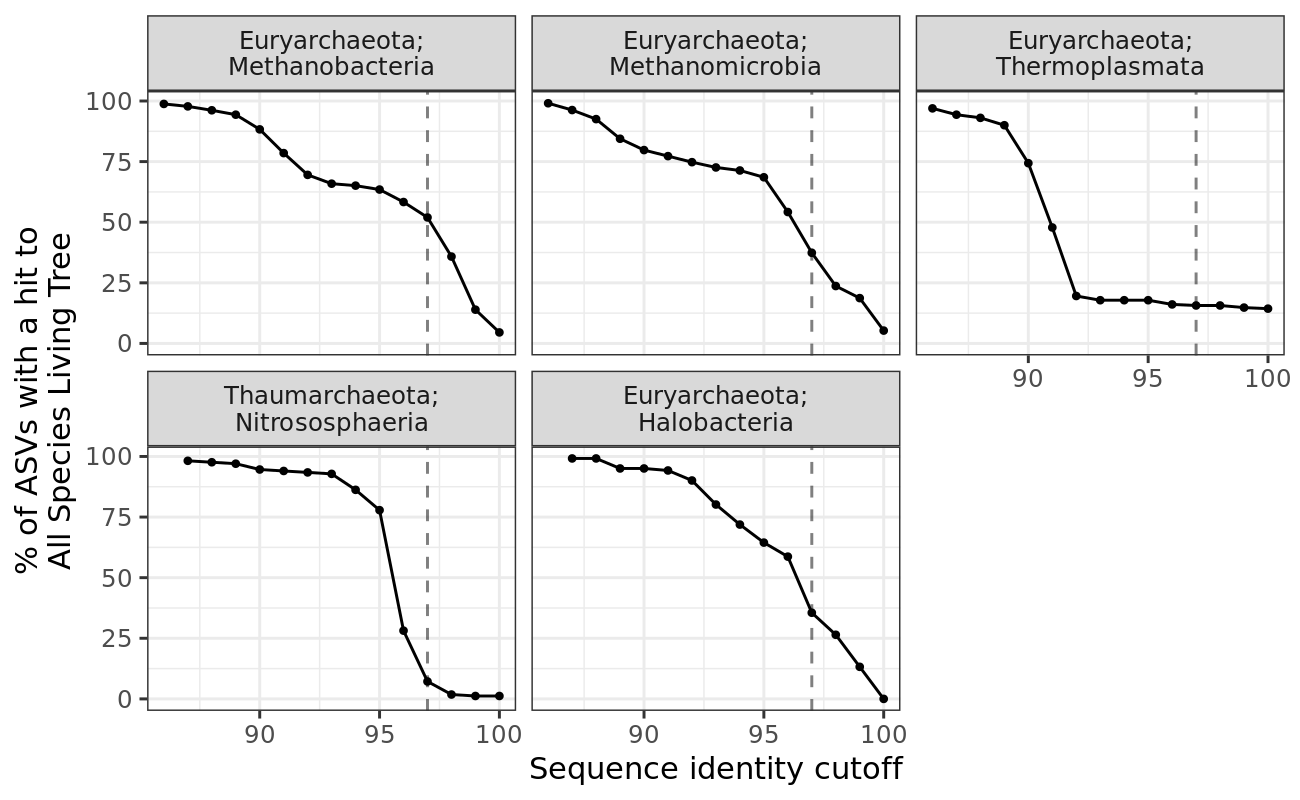

In [20]:
# plotting
p = df %>%
    mutate(Taxonomy = gsub(';', ';\n', Taxonomy)) %>%
    filter(Taxonomy != 'Other') %>%
    mutate(Taxonomy = Taxonomy %>% reorder(-total_per_tax_OTUs)) %>%
    ggplot(aes(seqID_cutoff)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line(aes(y=perc_OTUs_with_hit)) +
    geom_point(aes(y=perc_OTUs_with_hit), size=0.8) +
    #scale_color_gradient('No. of ASVs\n(log10)', low='black', high='red') +
    facet_wrap(~ Taxonomy) +
    labs(x='Sequence identity cutoff',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() 

p.dims(6.5,4)
plot(p)

In [21]:
# breakdown at 97% seqID
df.dims(10)
df %>%
    filter(seqID_cutoff == 97,
           Taxonomy != 'Other') %>%
    arrange(-perc_OTUs_without_hit)
df.dims()

Taxonomy,total_per_tax_OTUs,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,perc_total_OTUs_with_hit,perc_total_OTUs_without_hit,max_n_OTUs
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Thaumarchaeota;Nitrososphaeria,167,155,97,7.185629,92.81437,91.80328,8.196721,165
Euryarchaeota;Thermoplasmata,230,194,97,15.652174,84.34783,89.74088,10.259122,197
Euryarchaeota;Halobacteria,121,78,97,35.537190,64.46281,95.87520,4.124802,121
Euryarchaeota;Methanomicrobia,321,201,97,37.383178,62.61682,89.37070,10.629297,304
Euryarchaeota;Methanobacteria,991,476,97,51.967709,48.03229,74.82813,25.171867,946


In [22]:
# breakdown at 90% seqID
df.dims(10)
df %>%
    filter(seqID_cutoff == 90,
           Taxonomy != 'Other') %>%
    arrange(-perc_OTUs_without_hit)
df.dims()

Taxonomy,total_per_tax_OTUs,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,perc_total_OTUs_with_hit,perc_total_OTUs_without_hit,max_n_OTUs
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Euryarchaeota;Thermoplasmata,230,59,90,74.34783,25.652174,96.87996,3.1200423,197
Euryarchaeota;Methanomicrobia,321,65,90,79.75078,20.249221,96.56267,3.4373347,304
Euryarchaeota;Methanobacteria,991,116,90,88.29465,11.705348,93.86568,6.1343205,946
Thaumarchaeota;Nitrososphaeria,167,9,90,94.61078,5.389222,99.52406,0.4759387,165
Euryarchaeota;Halobacteria,121,6,90,95.04132,4.958678,99.68271,0.3172924,121


### Distribution of OTUs lacking a rep

In [23]:
pident_cutoff = 0.97

In [24]:
# sample metadata
meta = physeq_arch_IndD %>%
    phyloseq2df(sample_data) %>%
    dplyr::select(SampleID, scientific_name, 
                  class, order, family, genus,
                  habitat, diet, digestive_system,
                  captive_wild, sample_type)
meta

SampleID,scientific_name,class,order,family,genus,habitat,diet,digestive_system,captive_wild,sample_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
F14_Common_Bream,Abramis_brama,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,aquatic habitat,omnivore,simple,wild,feces
F35_Red_Deer,Cervus_elaphus,Mammalia,Artiodactyla,Cervidae,Cervus,terrestrial habitat,herbivore,foregut,wild,feces
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X431_Quagga,Equus_quagga,Mammalia,Perissodactyla,Equidae,Equus,terrestrial habitat,herbivore,hindgut,captive,feces
X67_European_Roe,Capreolus_capreolus,Mammalia,Artiodactyla,Cervidae,Capreolus,terrestrial habitat,herbivore,foregut,wild,feces


In [25]:
# otu table
otu = physeq_arch_IndD %>%
    phyloseq2df(otu_table, long = TRUE)
otu 

OTU,Sample,Count
<chr>,<chr>,<dbl>
0e97060fe4b9be17bddeedcd27826b04,F14_Common_Bream,0
a86c26bd7f16d93e38b101dbd2614a07,F14_Common_Bream,0
⋮,⋮,⋮
9449f372c36cd2d8994d79b091425d42,X67_European_Roe,0
467eeae6997d3667b5d07a76bc1bcdfd,X67_European_Roe,0


In [26]:
# joining tables
overlap(blast_res_s, otu, qaccver, OTU)
blast_res_s_j = blast_res_s %>%
    right_join(otu, c('qaccver'='OTU')) %>%
    inner_join(meta, c('Sample'='SampleID')) %>%
    dplyr::select(-Domain, -Phylum, -Class, -Order, -Family, -Genus) %>%
    inner_join(physeq_arch_IndD %>% phyloseq2df(tax_table), 
               c('qaccver'='OTU'))
blast_res_s_j

intersect(x,y): 1744 
setdiff(x,y): 0 
setdiff(y,x): 147 
union(x,y): 1891 


qaccver,max_pident,Sample,Count,scientific_name,class,order,family,genus,habitat,⋯,digestive_system,captive_wild,sample_type,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
e49aea031100097ee25afdeb3fa5ca11,85.012,F14_Common_Bream,0,Abramis_brama,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,aquatic habitat,⋯,simple,wild,feces,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei
e49aea031100097ee25afdeb3fa5ca11,85.012,F35_Red_Deer,0,Cervus_elaphus,Mammalia,Artiodactyla,Cervidae,Cervus,terrestrial habitat,⋯,foregut,wild,feces,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Haemonchus placei
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ef02b880ce3046db6ea55417877cb35b,NA,X67_European_Roe,0,Capreolus_capreolus,Mammalia,Artiodactyla,Cervidae,Capreolus,terrestrial habitat,⋯,foregut,wild,feces,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified
467eeae6997d3667b5d07a76bc1bcdfd,NA,X67_European_Roe,0,Capreolus_capreolus,Mammalia,Artiodactyla,Cervidae,Capreolus,terrestrial habitat,⋯,foregut,wild,feces,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified


In [27]:
# perc w/ hit per sample
blast_res_s_j_s = blast_res_s_j %>%
    filter(Count > 0) %>%
    group_by(Sample, class, order, family, genus, scientific_name,
             habitat, diet, digestive_system, captive_wild, sample_type) %>%
    summarize(perc_OTUs_with_hit = sum(max_pident >= pident_cutoff, na.rm=TRUE) / length(unique(qaccver)) * 100,
              .groups='drop')

blast_res_s_j_s %>% .$perc_OTUs_with_hit %>% summary
blast_res_s_j_s

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.28   96.15  100.00   97.01  100.00  100.00 

Sample,class,order,family,genus,scientific_name,habitat,diet,digestive_system,captive_wild,sample_type,perc_OTUs_with_hit
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,aquatic habitat,omnivore,simple,wild,feces,88.88889
F157a_European_Toad,Amphibia,Anura,Bufonidae,Bufo,Bufo_bufo,terrestrial habitat,carnivore,simple,wild,feces,100.00000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper,Reptilia,Squamata,Viperidae,Vipera,Vipera_ursinii,terrestrial habitat,carnivore,simple,wild,feces,100.00000
X96_European_Hare,Mammalia,Lagomorpha,Leporidae,Lepus,Lepus_europaeus,terrestrial habitat,herbivore,hindgut,wild,feces,84.61538


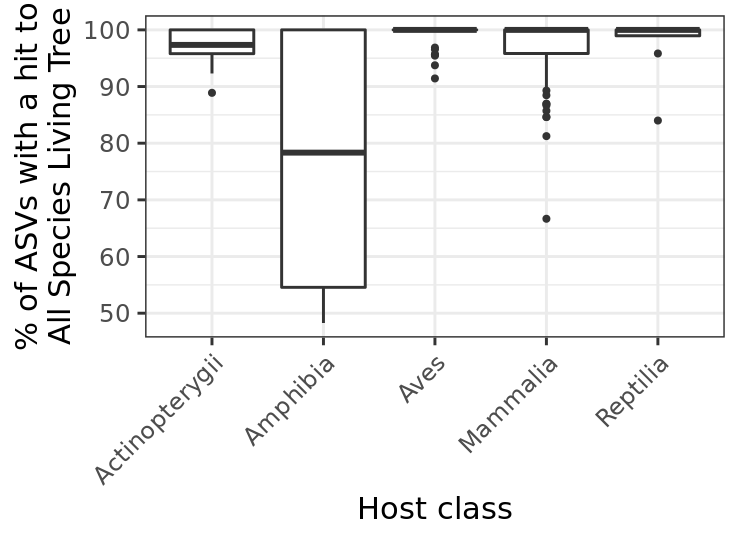

In [28]:
# plotting
p = blast_res_s_j_s %>%
    ggplot(aes(class, perc_OTUs_with_hit)) +
    geom_boxplot(outlier.size=0.7) +
    labs(x='Host class',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(3.7,2.7)
plot(p)

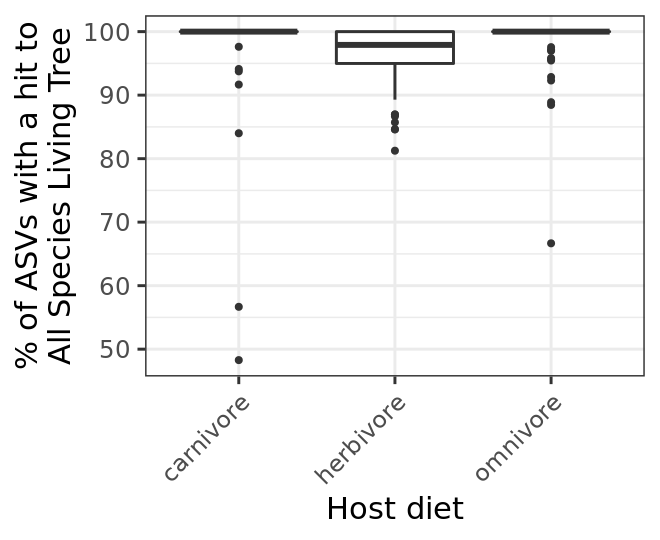

In [29]:
# plotting
p = blast_res_s_j_s %>%
    ggplot(aes(diet, perc_OTUs_with_hit)) +
    geom_boxplot(outlier.size=0.7) +
    labs(x='Host diet',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(3.3,2.7)
plot(p)

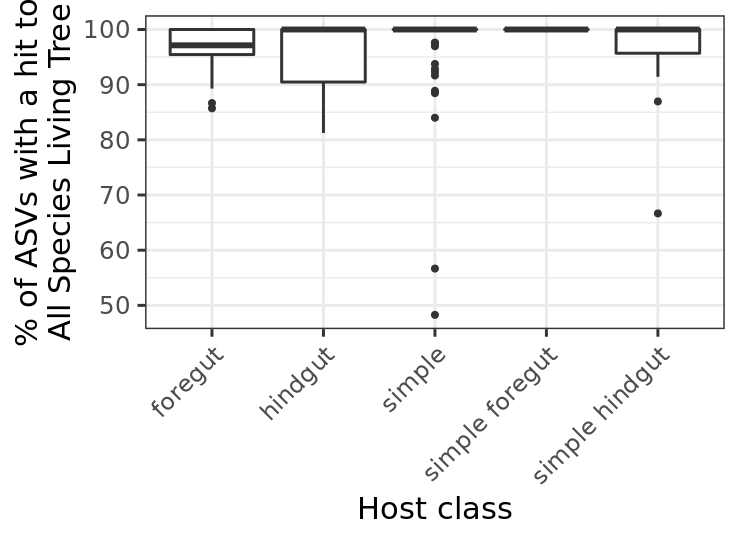

In [30]:
# plotting
p = blast_res_s_j_s %>%
    mutate(digestive_system = digestive_system %>% as.character,
           digestive_system = gsub('fermentation activity ', '', digestive_system)) %>%
    ggplot(aes(digestive_system, perc_OTUs_with_hit)) +
    geom_boxplot(outlier.size=0.7) +
    labs(x='Host class',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(3.7,2.7)
plot(p)

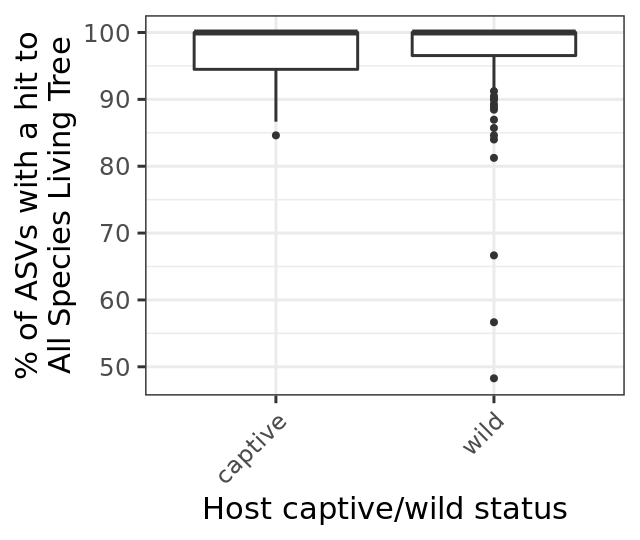

In [31]:
# plotting
p = blast_res_s_j_s %>%
    ggplot(aes(captive_wild, perc_OTUs_with_hit)) +
    geom_boxplot(outlier.size=0.7) +
    labs(x='Host captive/wild status',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(3.2,2.7)
plot(p)

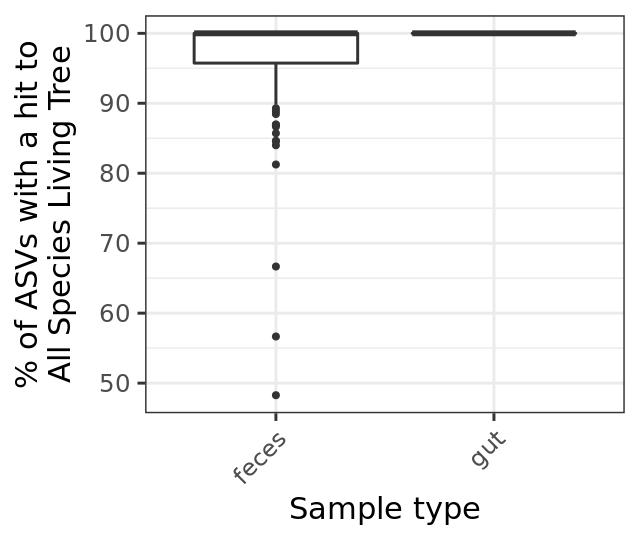

In [32]:
# plotting
p = blast_res_s_j_s %>%
    ggplot(aes(sample_type, perc_OTUs_with_hit)) +
    geom_boxplot(outlier.size=0.7) +
    labs(x='Sample type',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(3.2,2.7)
plot(p)

#### iTOL

In [33]:
# getting mean per sample
df = blast_res_s_j_s %>%
    mutate(perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    group_by(scientific_name) %>%
    summarize(perc_OTUs_without_hit = mean(perc_OTUs_without_hit),
              .groups='drop') %>%
    as.data.frame
rownames(df) = df$scientific_name
df$scientific_name = NULL
df

,perc_OTUs_without_hit
,<dbl>
Abramis_brama,11.111111
Aepyceros_melampus,1.388889
⋮,⋮
Vulpes_vulpes,0
Zamenis_longissimus,0


In [34]:
# writing file
outfile = file.path(work_dir, 'LTP132_97pHit_SpecD_multibar.txt')
itol_multibar(df, 'LTP132_97pHit', outfile)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity//LTP132_97pHit_SpecD_multibar.txt 


### Distribution per microbe class

In [35]:
pident_cutoff = 0.97

In [36]:
# perc w/ hit per sample
blast_res_s_j_s = blast_res_s_j %>%
    filter(Count > 0) %>%
    mutate(Taxonomy = paste(Phylum, Class, sep=';')) %>%
    group_by(Sample) %>%
    mutate(total_count = sum(Count)) %>%
    group_by(Taxonomy, Sample) %>%
    mutate(tax_sum_abund = sum(Count) / total_count * 100) %>%
    group_by(Taxonomy) %>%
    mutate(tax_mean_abund = mean(tax_sum_abund)) %>%
    ungroup() %>%
    filter(tax_mean_abund >= 5) %>%
    group_by(Sample, class, order, family, genus, scientific_name, Taxonomy,
             habitat, diet, digestive_system, captive_wild, sample_type) %>%
    summarize(perc_OTUs_with_hit = sum(max_pident >= pident_cutoff, na.rm=TRUE) / length(unique(qaccver)) * 100,
              .groups='drop')

blast_res_s_j_s %>% .$perc_OTUs_with_hit %>% summary
blast_res_s_j_s

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00  100.00  100.00   96.08  100.00  100.00 

Sample,class,order,family,genus,scientific_name,Taxonomy,habitat,diet,digestive_system,captive_wild,sample_type,perc_OTUs_with_hit
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,Crenarchaeota;Bathyarchaeia,aquatic habitat,omnivore,simple,wild,feces,0
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,Euryarchaeota;Methanobacteria,aquatic habitat,omnivore,simple,wild,feces,100
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X95_Meadow_Viper,Reptilia,Squamata,Viperidae,Vipera,Vipera_ursinii,Thaumarchaeota;Nitrososphaeria,terrestrial habitat,carnivore,simple,wild,feces,100.00000
X96_European_Hare,Mammalia,Lagomorpha,Leporidae,Lepus,Lepus_europaeus,Euryarchaeota;Methanobacteria,terrestrial habitat,herbivore,hindgut,wild,feces,84.61538


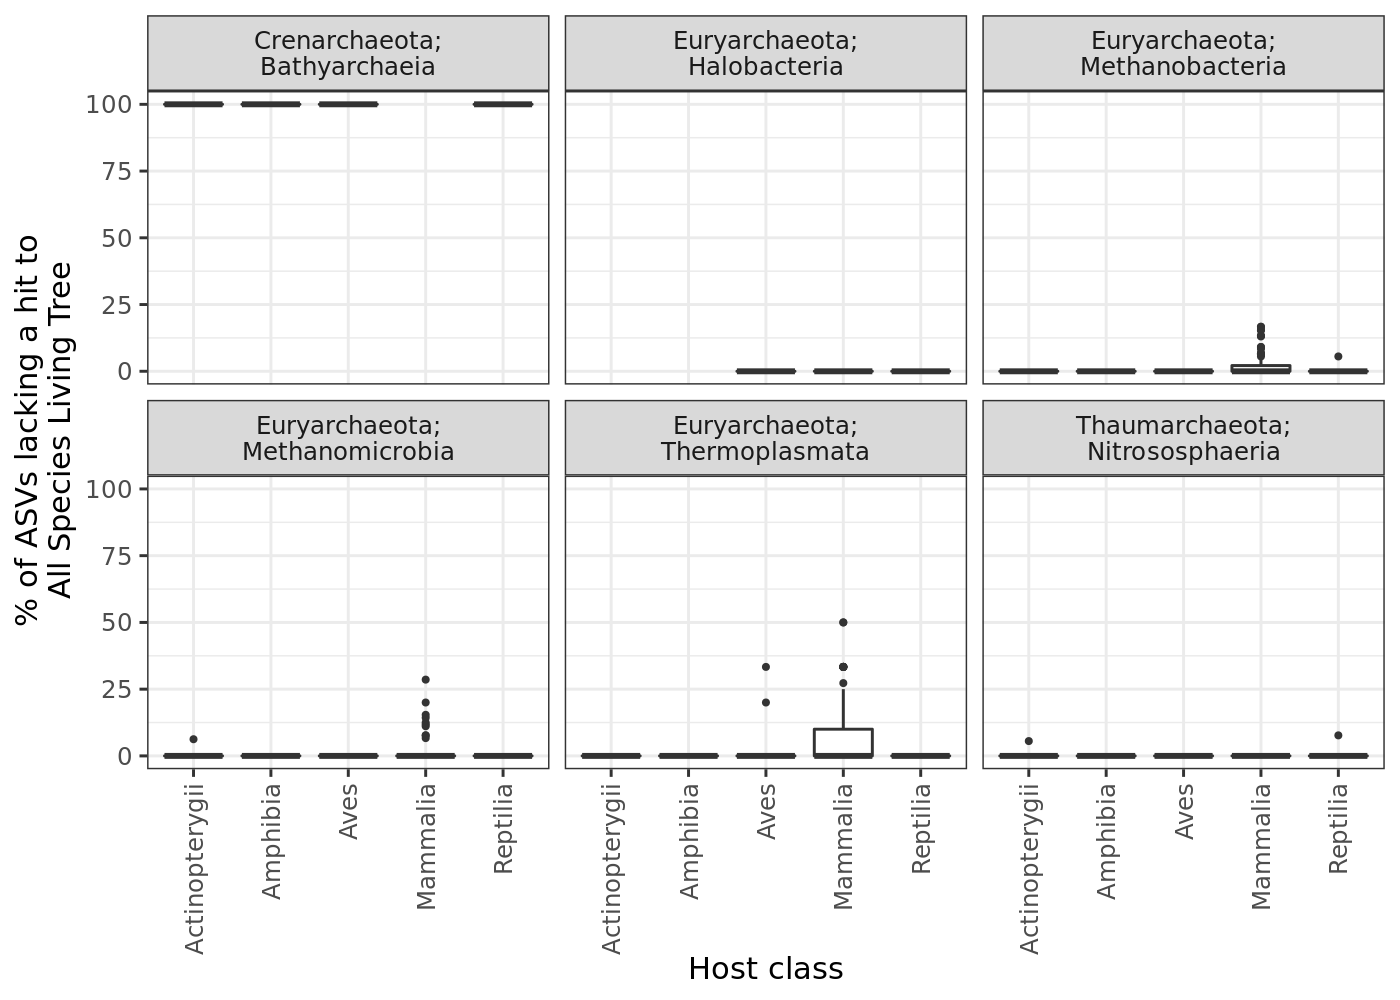

In [37]:
# plotting
p = blast_res_s_j_s %>%
    mutate(Taxonomy = gsub(';', ';\n', Taxonomy),
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit) %>%
    ggplot(aes(class, perc_OTUs_without_hit)) +
    geom_boxplot(outlier.size=0.7) +
    labs(x='Host class',
         y='% of ASVs lacking a hit to\nAll Species Living Tree') +
    facet_wrap(~ Taxonomy) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=90, hjust=1, vjust=0.5)
    )

p.dims(7,5)
plot(p)

#### iTOL

In [38]:
itol_multibar = function(df, dataset_label, out_file, out_dir=NULL,
                         legend=NULL, WIDTH=200, COLOR="#ff0000"){
  if(! is.null(out_dir)){
    out_file = file.path(out_dir, out_file)
  }
  # Main params
  cat('DATASET_MULTIBAR\n', file=out_file)
  cat('SEPARATOR SPACE\n', file=out_file, append=TRUE)
  cat(sprintf('DATASET_LABEL %s\n', dataset_label), file=out_file, append=TRUE)
  cat(sprintf('COLOR %s\n', COLOR), file=out_file, append=TRUE)
  cat(sprintf('WIDTH %s\n', WIDTH), file=out_file, append=TRUE)

  # Field labels
  labs = gsub(' ', '_', colnames(df))
  labs = sprintf('FIELD_LABELS %s\n', paste(labs, collapse=' '))
  cat(labs, file=out_file, append=TRUE)

  # Field colors
  if(is.null(legend)){
    cols = rainbow(ncol(df))
    cols = gsub('FFFF00FF', 'FFD966', cols)
  } else {
    cols = legend$colors %>% as.character
  }
  cols = sprintf('FIELD_COLORS %s\n', paste(cols, collapse=' '))
  cat(cols, file=out_file, append=TRUE)
  

  # legend
  cat(sprintf('LEGEND_TITLE %s\n', dataset_label), file=out_file, append=TRUE)
  if(is.null(legend)){
    shapes = rep(1, colnames(df) %>% length)
    cols = rainbow(length(shapes))
    cols = gsub('FFFF00FF', 'FFD966', cols)
    labs = paste(gsub(' ', '_', colnames(df)), collapse=' ')
  } else {
    stopifnot(all(colnames(legend) %in% c('shapes', 'colors', 'labels')))
    shapes = legend$shapes %>% as.character
    cols = legend$colors %>% as.character
    labs = legend$labels %>% as.character
  }
  cat(sprintf('LEGEND_SHAPES %s\n', paste(shapes, collapse=' ')),
      file=out_file, append=TRUE)
  cat(sprintf('LEGEND_COLORS %s\n', paste(cols, collapse=' ')),
      file=out_file, append=TRUE)
  cat(sprintf('LEGEND_LABELS %s\n', paste(labs, collapse=' ')), file=out_file, append=TRUE)

  # Data
  cat('DATA\n', file=out_file, append=TRUE)
  write.table(df, file=out_file, append=TRUE, sep=' ',
              quote=FALSE, row.names=TRUE, col.names=FALSE)
  cat('File written:', out_file, '\n')
}

In [39]:
# getting mean per sample
df = blast_res_s_j_s %>%
    mutate(perc_OTUs_without_hit = 100 - perc_OTUs_with_hit)%>%
    group_by(scientific_name, Taxonomy) %>%
    summarize(perc_OTUs_without_hit = mean(perc_OTUs_without_hit),
              .groups='drop') %>%
    spread(Taxonomy, perc_OTUs_without_hit, fill=0) %>%
    as.data.frame
rownames(df) = df$scientific_name
df$scientific_name = NULL
df = df[,sort(colnames(df), decreasing=TRUE)]
colnames(df) = gsub(';', '-', colnames(df))
df

,Thaumarchaeota-Nitrososphaeria,Euryarchaeota-Thermoplasmata,Euryarchaeota-Methanomicrobia,Euryarchaeota-Methanobacteria,Euryarchaeota-Halobacteria,Crenarchaeota-Bathyarchaeia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abramis_brama,0,0,6.25,0.0000,0,100
Aepyceros_melampus,0,0,0.00,1.5625,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vulpes_vulpes,0,0,0,0,0,0
Zamenis_longissimus,0,0,0,0,0,0


In [40]:
# writing file
outfile = file.path(work_dir, 'LTP132_97pHit_SpecD_per-class_htmp.txt')
itol_heatmap(df, 'LTP132_97pHit_class', outfile, dist_method = 'bray')

Warning message in vegan::vegdist(., method = dist_method):
“you have empty rows: their dissimilarities may be meaningless in method “bray””


File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity//LTP132_97pHit_SpecD_per-class_htmp.txt 


### Methanobactericeae

* How novel are the Methanothermobacter ASVs in particular?

In [94]:
# adding taxonomy
tax = physeq_arch_IndD %>%
    phyloseq2df(tax_table) %>%
    as.data.table %>%
    mutate(Taxonomy = paste(Family, Genus, sep=';')) %>%
    group_by(Taxonomy) %>%
    summarize(total_per_tax_OTUs = n(), .groups='drop')
df.dims(10)
tax %>% arrange(-total_per_tax_OTUs)
df.dims()

Taxonomy,total_per_tax_OTUs
<chr>,<int>
Methanobacteriaceae;Methanobrevibacter,699
Methanocorpusculaceae;Methanocorpusculum,215
Methanobacteriaceae;Methanosphaera,188
Methanomethylophilaceae;uncultured,91
Methanomethylophilaceae;Candidatus Methanomethylophilus,61
⋮,⋮
Nitrosopumilaceae;unclassified,1
Nitrososphaeraceae;unidentified archaeon SCA1166,1
uncultured eukaryote;uncultured eukaryote,1


In [96]:
#' OTUs with a hit
otus_with_rep = function(seqid_cutoff, blast_res_s, tax_table){      
    x = blast_res_s %>%
        mutate(Taxonomy = paste(Family, Genus, sep=';')) %>%
        left_join(tax_table, c('Taxonomy')) %>%
        filter(max_pident < seqid_cutoff) %>%
        distinct(Taxonomy, qaccver, total_per_tax_OTUs) %>%
        group_by(Taxonomy, total_per_tax_OTUs) %>%
        summarize(n_OTUs = n(), 
                  .groups='drop')
    x$seqID_cutoff = seqid_cutoff
    return(x)
}

In [97]:
# per cutoff
seqID_cutoff = 86:100
df = lapply(as.list(seqID_cutoff), 
            otus_with_rep, 
            blast_res_s=as.data.frame(blast_res_s %>% 
                                      filter(Family %in% c('Methanobacteriaceae',
                                                           'Methanothermobacteraceae'))),
            tax_table=tax) %>%
    do.call(rbind, .) %>%
    mutate(perc_OTUs_with_hit = (1 - n_OTUs / total_per_tax_OTUs) * 100,
           perc_OTUs_without_hit = 100 - perc_OTUs_with_hit,
           perc_total_OTUs_with_hit = (1 - n_OTUs / total_OTUs) * 100,
           perc_total_OTUs_without_hit = 100 - perc_total_OTUs_with_hit) %>%
    group_by(Taxonomy) %>%
    mutate(max_n_OTUs = max(n_OTUs)) %>%
    ungroup() %>%
    filter(!grepl('unclassified|uncultured', Taxonomy))

tmp = df %>%
    filter(seqID_cutoff == 90) %>%
    mutate(perc_OTUs_with_hit = 100,
           seqID_cutoff = 85)
df 

Taxonomy,total_per_tax_OTUs,n_OTUs,seqID_cutoff,perc_OTUs_with_hit,perc_OTUs_without_hit,perc_total_OTUs_with_hit,perc_total_OTUs_without_hit,max_n_OTUs
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Methanobacteriaceae;Methanobrevibacter,699,10,86,98.56938,1.4306152,99.47118,0.52882073,662
Methanobacteriaceae;Methanosphaera,188,1,86,99.46809,0.5319149,99.94712,0.05288207,183
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Methanobacteriaceae;Methanosphaera,188,183,100,2.659574,97.34043,90.32258,9.677419,183
Methanothermobacteraceae;Methanothermobacter,39,38,100,2.564103,97.43590,97.99048,2.009519,38


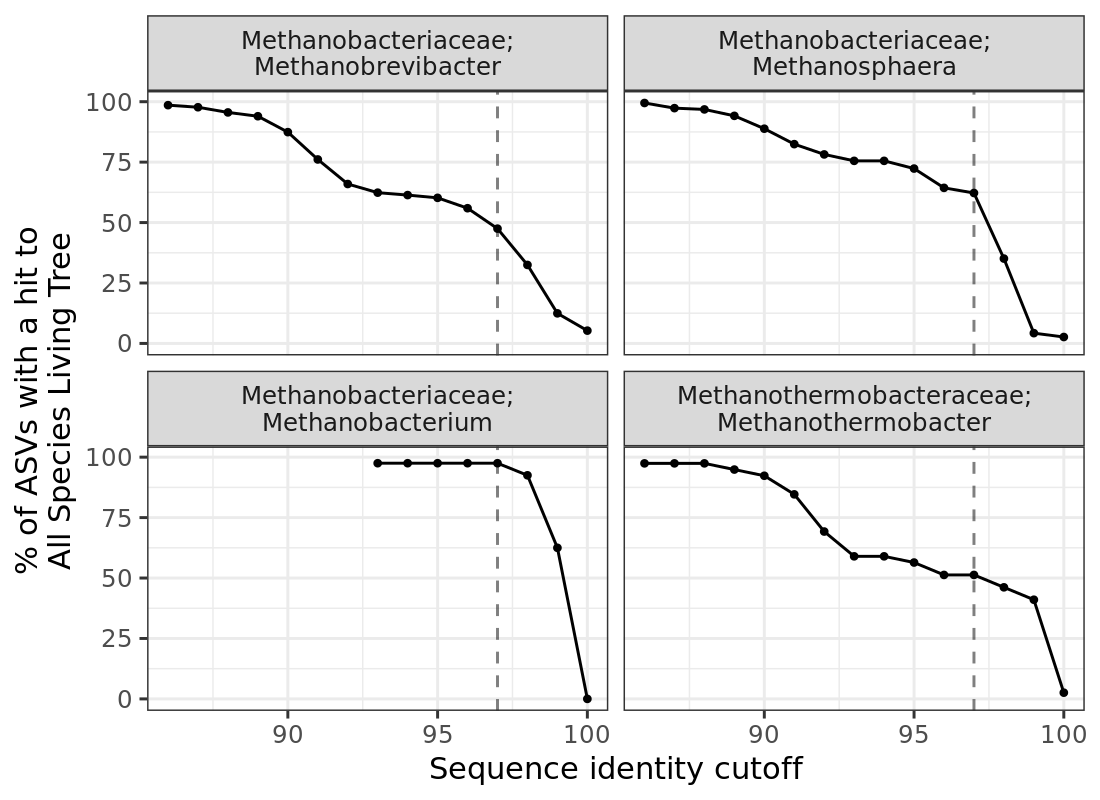

In [101]:
# plotting
p = df %>%
    mutate(Taxonomy = gsub(';', ';\n', Taxonomy)) %>%
    filter(Taxonomy != 'Other') %>%
    mutate(Taxonomy = Taxonomy %>% reorder(-total_per_tax_OTUs)) %>%
    ggplot(aes(seqID_cutoff)) +
    geom_vline(xintercept=97, linetype='dashed', alpha=0.5) +
    geom_line(aes(y=perc_OTUs_with_hit)) +
    geom_point(aes(y=perc_OTUs_with_hit), size=0.8) +
    facet_wrap(~ Taxonomy) +
    labs(x='Sequence identity cutoff',
         y='% of ASVs with a hit to\nAll Species Living Tree') +
    theme_bw() 

p.dims(5.5,4)
plot(p)

### Best hits for Methanothermobacter

In [123]:
# total hits 
blast_res_f = blast_res %>%
    filter(Genus == 'Methanothermobacter') %>%
    mutate(saccver = gsub('\\\\', '', saccver)) %>%
    separate(saccver, c('lcl', 'SSU', 'marker', 'length', 'family', 'acc'), sep='\\|')
blast_res_f

qaccver,lcl,SSU,marker,length,family,acc,pident,mismatch,gapopen,⋯,sstart,send,evalue,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,⋯,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
49f15f210d13333e7ff3f8a4a9afdfb8,lcl,LTPs132_SSU,MhtMarb2,1482bp,Methanobacteriaceae,X15364,89.882,31,6,⋯,458,882,2.21e-152,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,Methanothermobacter,unclassified
49f15f210d13333e7ff3f8a4a9afdfb8,lcl,LTPs132_SSU,MhtWolfe,1446bp,Methanobacteriaceae,AB104858,89.882,31,6,⋯,438,862,2.21e-152,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,Methanothermobacter,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9e14597a1b5c9ce09111b5343451fc2b,lcl,LTPs132_SSU,MeeSocia,1469bp,Methanothermaceae,HE654004,87.529,51,2,⋯,449,872,1.79e-138,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,Methanothermobacter,Methanothermobacter marburgensis str. Marburg
9e14597a1b5c9ce09111b5343451fc2b,lcl,LTPs132_SSU,MeeFervi,1481bp,Methanothermaceae,CP002278,86.854,53,3,⋯,457,881,1.80e-133,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanothermobacteraceae,Methanothermobacter,Methanothermobacter marburgensis str. Marburg


In [126]:
# number of hits per ASV
blast_res_f %>%
    group_by(acc) %>%
    summarize(n = n(), .groups='drop') %>%
    .$n %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,4,22,32,26.62069,33,36,11.7,4.776


In [132]:
blast_res_fj = blast_res_f %>%
    inner_join(LTP_blast_csv, c('acc'='V1'))
blast_res_fj

qaccver,lcl,SSU,marker,length,family,acc,pident,mismatch,gapopen,⋯,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
49f15f210d13333e7ff3f8a4a9afdfb8,lcl,LTPs132_SSU,MhtMarb2,1482bp,Methanobacteriaceae,X15364,89.882,31,6,⋯,1641,3122,s93,Methanothermobacter marburgensis,,Methanobacteriaceae,1,http://www.bacterio.net/methanothermobacter.html,Archaea/Euryarchaeota/Methanobacteria/Methanobacteriaceae,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanothermobacter
49f15f210d13333e7ff3f8a4a9afdfb8,lcl,LTPs132_SSU,MhtWolfe,1446bp,Methanobacteriaceae,AB104858,89.882,31,6,⋯,1,1446,s93,Methanothermobacter wolfeii,,Methanobacteriaceae,1,http://www.bacterio.net/methanothermobacter.html,Archaea/Euryarchaeota/Methanobacteria/Methanobacteriaceae,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanothermobacter
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9e14597a1b5c9ce09111b5343451fc2b,lcl,LTPs132_SSU,MeeSocia,1469bp,Methanothermaceae,HE654004,87.529,51,2,⋯,1,1469,s115,Methanothermus sociabilis,,Methanothermaceae,1,http://www.bacterio.net/methanothermus.html,Archaea/Euryarchaeota/Methanobacteria/Methanothermaceae,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanothermaceae;Methanothermus
9e14597a1b5c9ce09111b5343451fc2b,lcl,LTPs132_SSU,MeeFervi,1481bp,Methanothermaceae,CP002278,86.854,53,3,⋯,767977,769457,s106,Methanothermus fervidus,type sp.,Methanothermaceae,1,http://www.bacterio.net/methanothermus.html,Archaea/Euryarchaeota/Methanobacteria/Methanothermaceae,Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanothermaceae;Methanothermus


In [153]:
# best hit
blast_res_fjf = blast_res_fj %>%
    group_by(qaccver) %>%
    mutate(rank = row_number(-pident)) %>%
    ungroup() %>%
    filter(rank %in% c(1)) %>%
    dplyr::select(qaccver, pident, rank, marker, length, V5)

# summary
total = blast_res_fjf %>% distinct(qaccver) %>% nrow
mtherm = blast_res_fjf  %>%
    filter(grepl('Methanothermobacter', V5)) %>%
    distinct(qaccver) %>% nrow

cat(sprintf('Of %s ASVs, %s have hit to Methanothermobacter\n', total, mtherm))

Of 38 ASVs, 36 have hit to Methanothermobacter


In [154]:
# top 2 hits
blast_res_fjf = blast_res_fj %>%
    group_by(qaccver) %>%
    mutate(rank = row_number(-pident)) %>%
    ungroup() %>%
    filter(rank %in% c(1:2)) %>%
    dplyr::select(qaccver, pident, rank, marker, length, V5)

# summary
total = blast_res_fjf %>% distinct(qaccver) %>% nrow
mtherm = blast_res_fjf  %>%
    filter(grepl('Methanothermobacter', V5)) %>%
    distinct(qaccver) %>% nrow

cat(sprintf('Of %s ASVs, %s have hit to Methanothermobacter\n', total, mtherm))

Of 38 ASVs, 36 have hit to Methanothermobacter


In [157]:
# top 3 hits
blast_res_fjf = blast_res_fj %>%
    group_by(qaccver) %>%
    mutate(rank = row_number(-pident)) %>%
    ungroup() %>%
    filter(rank %in% c(1:3)) %>%
    dplyr::select(qaccver, pident, rank, marker, length, V5)

# summary
total = blast_res_fjf %>% distinct(qaccver) %>% nrow
mtherm = blast_res_fjf  %>%
    filter(grepl('Methanothermobacter', V5)) %>%
    distinct(qaccver) %>% nrow

cat(sprintf('Of %s ASVs, %s have hit to Methanothermobacter\n', total, mtherm))

Of 38 ASVs, 37 have hit to Methanothermobacter


In [158]:
# top 5 hits
blast_res_fjf = blast_res_fj %>%
    group_by(qaccver) %>%
    mutate(rank = row_number(-pident)) %>%
    ungroup() %>%
    filter(rank %in% c(1:5)) %>%
    dplyr::select(qaccver, pident, rank, marker, length, V5)

# summary
total = blast_res_fjf %>% distinct(qaccver) %>% nrow
mtherm = blast_res_fjf  %>%
    filter(grepl('Methanothermobacter', V5)) %>%
    distinct(qaccver) %>% nrow

cat(sprintf('Of %s ASVs, %s have hit to Methanothermobacter\n', total, mtherm))

Of 38 ASVs, 37 have hit to Methanothermobacter


#### Adding average abundances

In [187]:
meta = physeq_arch_IndD %>%
    phyloseq2df(sample_data) %>%
    dplyr::select(Sample, class)

tax = physeq_arch_IndD %>%
    phyloseq2df(tax_table) %>%
    filter(Genus == 'Methanothermobacter')

otu = physeq_arch_IndD %>%
    phyloseq::transformSampleCounts(function(x) x/sum(x) * 100) %>%
    phyloseq2df(otu_table, long=TRUE) %>%
    inner_join(tax, c('OTU')) %>%
    inner_join(meta, c('Sample')) %>%
    group_by(OTU) %>%
    mutate(total_mean_abund = mean(Count)) %>%
    group_by(OTU, class, total_mean_abund) %>% 
    summarize(mean_abund = mean(Count),
              .groups='drop')

otu$total_mean_abund %>% summary_x
otu$mean_abund %>% summary_x
otu

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0.0002978185,0.001214243,0.002428486,0.6150858,0.4705523,3.813713,1.492,0.609


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0,0,0,0.7548818,0.4293263,9.361535,3.738,1.526


OTU,class,total_mean_abund,mean_abund
<chr>,<chr>,<dbl>,<dbl>
065aa600f85d38fa5fbb39aaaa096ff2,Actinopterygii,0.0002978185,0
065aa600f85d38fa5fbb39aaaa096ff2,Amphibia,0.0002978185,0
⋮,⋮,⋮,⋮
fc9e283f48f653c1b54f860d9cf996cf,Mammalia,0.01841927,0.0221644
fc9e283f48f653c1b54f860d9cf996cf,Reptilia,0.01841927,0.0000000


In [188]:
# checking overlap
overlap(blast_res_fjf$qaccver, otu$OTU)

intersect(x,y): 38 
setdiff(x,y): 0 
setdiff(y,x): 1 
union(x,y): 39 


In [203]:
blast_res_fjfj = blast_res_fjf %>%
    inner_join(otu, c('qaccver' = 'OTU')) %>%
    mutate(total_mean_abund = round(total_mean_abund, 4),
           mean_abund = round(mean_abund, 4)) %>%
    spread(class, mean_abund) %>%
    arrange(-total_mean_abund, rank) %>%
    rename('Methanothermobacter ASV' = qaccver,
           'BLASTn % identity' = pident,
           '% identity rank' = rank,
           'Gene ID' = marker,
           'Gene length' = length,
           'BLAST hit: species' = V5,
           'Mean % abundance' = total_mean_abund,
           'Actinopterygii: Mean % abund.' = Actinopterygii,
           'Amphibia: Mean % abund.' = Amphibia,
           'Reptilia: Mean % abund.' = Reptilia,
           'Aves: Mean % abund.' = Aves,
           'Mammalia: Mean % abund.' = Mammalia)
 blast_res_fjfj          

Methanothermobacter ASV,BLASTn % identity,% identity rank,Gene ID,Gene length,BLAST hit: species,Mean % abundance,Actinopterygii: Mean % abund.,Amphibia: Mean % abund.,Aves: Mean % abund.,Mammalia: Mean % abund.,Reptilia: Mean % abund.
<chr>,<dbl>,<int>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
859b0f9281126ff8d74d751373fd8891,99.294,1,MhtMarb2,1482bp,Methanothermobacter marburgensis,3.8137,3.2126,5.4846,9.3615,2.4209,4.5432
859b0f9281126ff8d74d751373fd8891,98.824,2,MhtWolfe,1446bp,Methanothermobacter wolfeii,3.8137,3.2126,5.4846,9.3615,2.4209,4.5432
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
065aa600f85d38fa5fbb39aaaa096ff2,98.824,5,MhtTher4,1432bp,Methanothermobacter thermophilus,3e-04,0,0,0.000,4e-04,0
73c16f2a05ba87177cdec602099114d0,91.315,5,MhtTher4,1432bp,Methanothermobacter thermophilus,3e-04,0,0,0.002,0e+00,0


In [204]:
out_file = file.path(work_dir, 'Mthermobacter_LTP_top-hits.tsv')
write_table(blast_res_fjfj, out_file, sep='\t')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/type_strain_similarity//Mthermobacter_LTP_top-hits.tsv 


# sessionInfo

In [401]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ape_5.4           tidytable_0.4.1   tidyselect_1.1.0  data.table_1.12.8
[5] LeyLabRMisc_0.1.5 phyloseq_1.30.0   ggplot2_3.3.1     tidyr_1.1.0      
[9] dplyr_1.0.0      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6        lattice_0.20-41     Biostrings_2.54.0  
